<a href="https://colab.research.google.com/github/enjimohamed/CODSOFT/blob/main/IRIS_FLOWER_CLASSIFICATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries

In [126]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Read Data

In [127]:
flower=pd.read_csv('IRIS.csv')

In [128]:
flower.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# Preprocessing

In [129]:
flower.duplicated().sum()

3

In [130]:
flower.drop_duplicates(inplace=True)

In [131]:
flower.duplicated().sum()

0

In [132]:
flower.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

# Data Visualization

<Axes: xlabel='species', ylabel='count'>

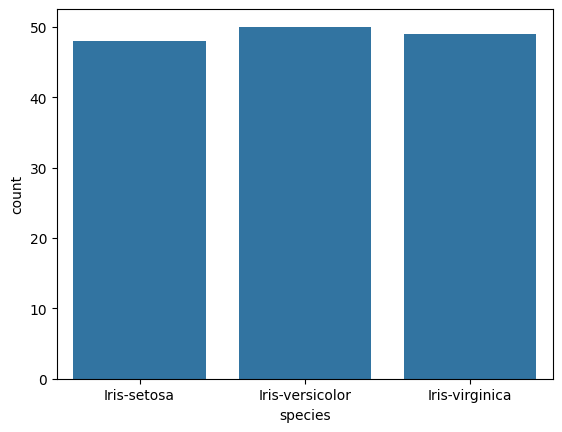

In [133]:
sns.countplot(x='species',data=flower)

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

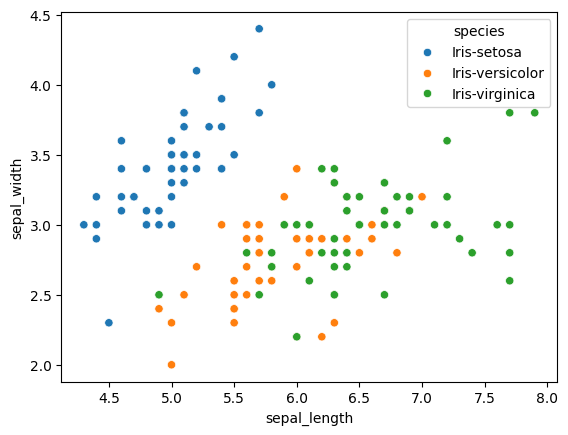

In [134]:
sns.scatterplot(x='sepal_length',y='sepal_width',data=flower,hue='species')

<Axes: xlabel='petal_length', ylabel='petal_width'>

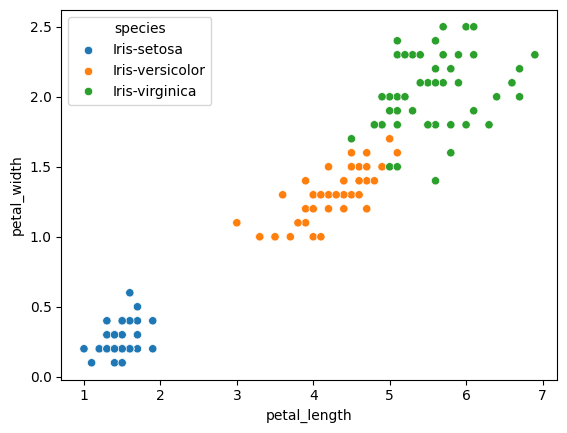

In [135]:
sns.scatterplot(x='petal_length',y='petal_width',data=flower,hue='species')

# Encoding

In [136]:
labelenc=LabelEncoder()
flower['species']=labelenc.fit_transform(flower['species'])

# Correlation

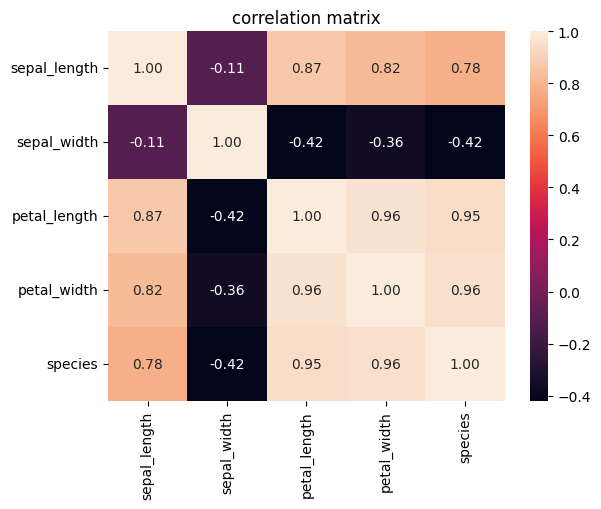

In [137]:
sns.heatmap(flower.corr(),annot=True,fmt='.2f')
plt.title('correlation matrix')
plt.show()

# Models

In [138]:
x=flower.drop('species',axis=1)
y=flower['species']

In [139]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [140]:
model=LogisticRegression(max_iter=1000)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
acc=accuracy_score(y_test,y_pred)
print('accuracy:',{acc})

accuracy: {0.9333333333333333}


In [141]:
model=KNeighborsClassifier()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
acc=accuracy_score(y_test,y_pred)
print('accuracy:',{acc})

accuracy: {0.9555555555555556}
